In [1]:
# Library
import pandas as pd # data manipulation
import numpy as np # numeric operations
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

In [2]:
# read file
df = pd.read_csv("housing.csv")

# get general information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
# see 5 samples
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# see statistics summary the datasets
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# for simplicity, we will only take numeric columns
numeric_features = []
for f in df.columns.tolist():
    if df[f].dtype != object:
        numeric_features.append(f)
numeric_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

/Users/ajisamudra/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ajisamudra/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


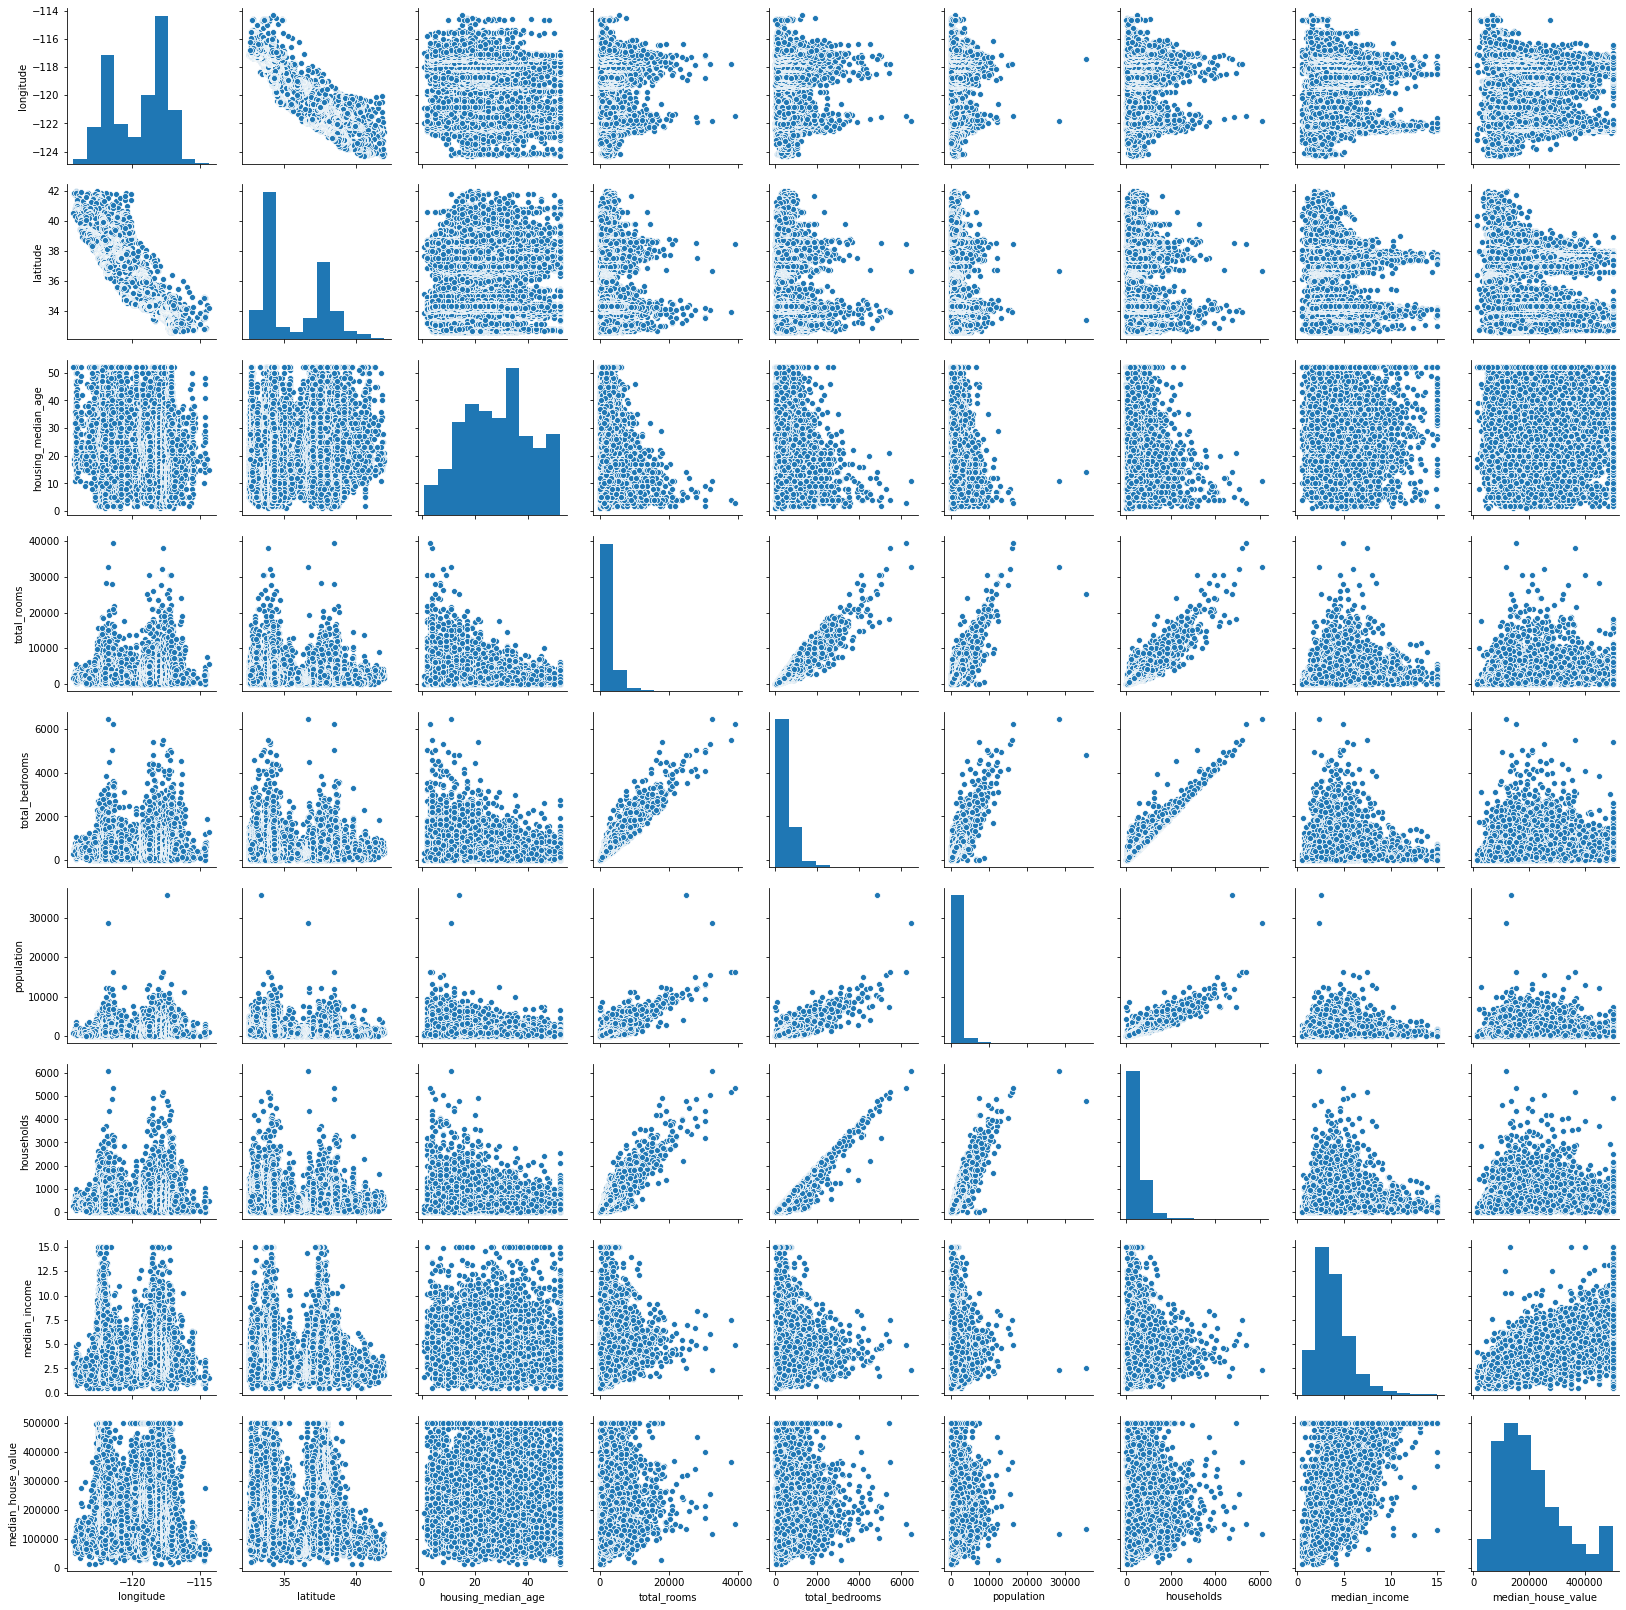

In [6]:
# see distribution of each features
sns.pairplot(df[numeric_features])

In [7]:
# check if there is null value in dataset
df.isnull().sum()

# we will address this later

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# Prepare dataset for machine learning model
# we will split the dataset into two parts i.e. training & validation set
# so we could measure how well the model will generalize in new data

from sklearn.model_selection import train_test_split

features = numeric_features.copy()
features.remove('median_house_value')
target = 'median_house_value'

X_train, X_val, y_train, y_val = train_test_split(df[features], # features space
                                                  df[target], # target variable
                                                  test_size=0.2, # proportion of validation set
                                                  random_state=101 # random seed
                                                 )

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [9]:
# sample of training data
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
6560,-118.13,34.19,48.0,2539.0,425.0,930.0,364.0,4.7269
1071,-121.84,39.74,43.0,2976.0,599.0,1181.0,560.0,2.2621
11749,-121.15,38.80,20.0,2104.0,370.0,745.0,314.0,4.1685
13991,-117.08,34.96,28.0,1777.0,307.0,721.0,259.0,3.6343
17310,-119.50,34.35,39.0,308.0,38.0,59.0,21.0,11.7794


In [10]:
# After spliting the data, we will address following problems 
# 1. missing value
# 2. different scale between features

# for missing value we could impute them with several possible values
# such as 0, mean, median, or we even could do interpolation to impute the missing value
# it really depends on the specific case

# in this case, for simplicity we will impute the missing value with "mean"
# note that we could only calculate mean in the training set, and apply it to validation set
# to prevent data leakage

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')

# fit on training set
imputer.fit(X_train)

print("mean for each features in training set")
print(imputer.statistics_)

# perform imputation
X_train = imputer.transform(X_train)
X_val = imputer.transform(X_val)

# at this point, X_train is transformed from DataFrame to Array

mean for each features in training set
[-119.57434169   35.63783188   28.62378876 2634.8563469   537.72750076
 1425.09387112  499.36954942    3.87077307]


In [11]:
# to address 2nd problem we will use MinMaxScaler to convert different scale of each features
# so that the range of value for all features between 0 and 1

# MinMaxScaler = (value - Min) / (Max - Min)

# The same with imputation, we will only take Min & Max value of training set
# Then apply it to validation set
# so it prevent data leakage

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit on training set
scaler.fit(X_train)

# perform minmax scaling
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

# sample value after scaling
print("sample value after scaling")
print(X_train[0,:])

sample value after scaling
[0.61761762 0.17534538 0.92156863 0.06452515 0.06579764 0.03245457
 0.05969413 0.29151322]


In [12]:
# At this point we are ready to build machine learning model
# We will use the simplest one : linear regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

# fit on training set
model.fit(X_train, y_train)

# predict the validation set
y_pred = model.predict(X_val)

In [13]:
# lets compare the actual and prediction value
result = {"actual" : y_val, "prediction" : y_pred}
df_result = pd.DataFrame(result)
df_result['error'] = np.absolute(df_result.actual - df_result.prediction)
df_result.head()

,actual,prediction,error
16086,406200.0,317512.677202,88687.322798
8816,500001.0,543838.210545,43837.210545
7175,122900.0,154784.208355,31884.208355
16714,209100.0,253536.779133,44436.779133
14491,500001.0,453693.051620,46307.948380


In [14]:
# measure the regression metrics
# 1. root mean squared error (rmse)
# 2. mean absolute error (mae)

from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)

print("RMSE on validation set:", rmse)
print("MAE on validation set:", mae)

RMSE on validation set: 73340.67450054987
MAE on validation set: 52252.975295642


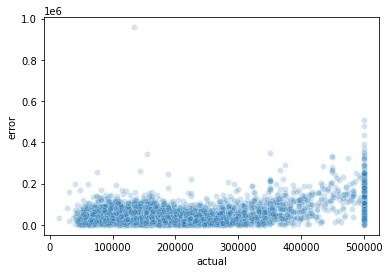

In [15]:
# error analysis
# we will find out that where the model perform better and or worse
sns.scatterplot(data=df_result, x='actual', y='error', alpha=0.2)

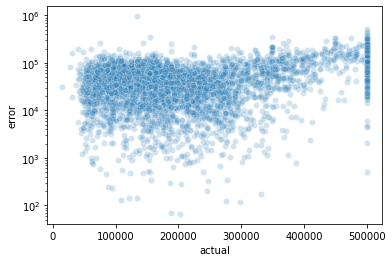

In [16]:
# lets scale the y-axis using log
sns.scatterplot(data=df_result, x='actual', y='error', alpha=0.2)
plt.yscale('log')

(array([-1500000., -1250000., -1000000.,  -750000.,  -500000.,  -250000.,
               0.,   250000.,   500000.,   750000.]),
 <a list of 10 Text major ticklabel objects>)

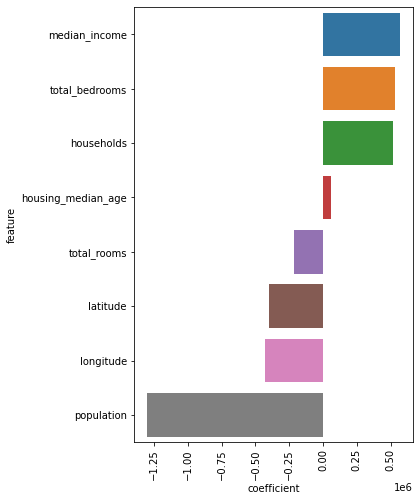

In [17]:
# model coefficient
data = {'feature' : features, 'coefficient' : model.coef_}
model_coef = pd.DataFrame(data)
model_coef = model_coef.sort_values(by='coefficient', ascending = False)

plt.figure(figsize=(5,8))
sns.barplot(data=model_coef, x='coefficient', y='feature')
plt.xticks(rotation=90)